# Model One: DenseNet
In this notebook, we will take our initial test data and see if a DenseNet can distinguish patterns. The data we are feeding this algorithm is between: 2017,1,1 and 2017,9,1. Therefor this test data contains 12,000 images each contains 15 ticks of 30min intervals. Each image has also been labeled by whether there was an increase in price on the 20th day following the 15th day close of the image. 

If there was an increase by more than 2%, then it was a buy. If there was a decrease in price overall, it was a sell, otherwise a hold (in between 0 and 2 percent increase). 

We will be utilizing FastAI for our experiment. 

In [1]:
import torch
from torchvision.models import *
from fastai.vision import *

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
import gc

In [4]:
# Getting our paths 
images_path = f'{os.curdir}/model_data/images_unscattered'
labels_path = f'{os.curdir}/model_data/unscattered.csv'
path = f'{os.curdir}/model_data'

## Unscattered w/ Data Augmentation

In [23]:
tfms_ = get_transforms(do_flip=False, flip_vert=False, max_rotate=0.0, max_zoom=0.2, max_lighting=0.1, max_warp=0.0)

# Creating source object
seed = np.random.seed(42)
src = (ImageList.from_csv(path, csv_name='unscattered.csv', folder='images_unscattered', suffix='.png')
                     .split_by_rand_pct(0.1, seed)
                     .label_from_df())

# Creating data object function - returns data object
def get_data(image_size, batch_size):
    data = (src.transform(tfms=tfms_, size=image_size)
               .databunch(num_workers=2, bs=batch_size).normalize(imagenet_stats))
    
    return data

In [24]:
data = get_data((200,300), 8)

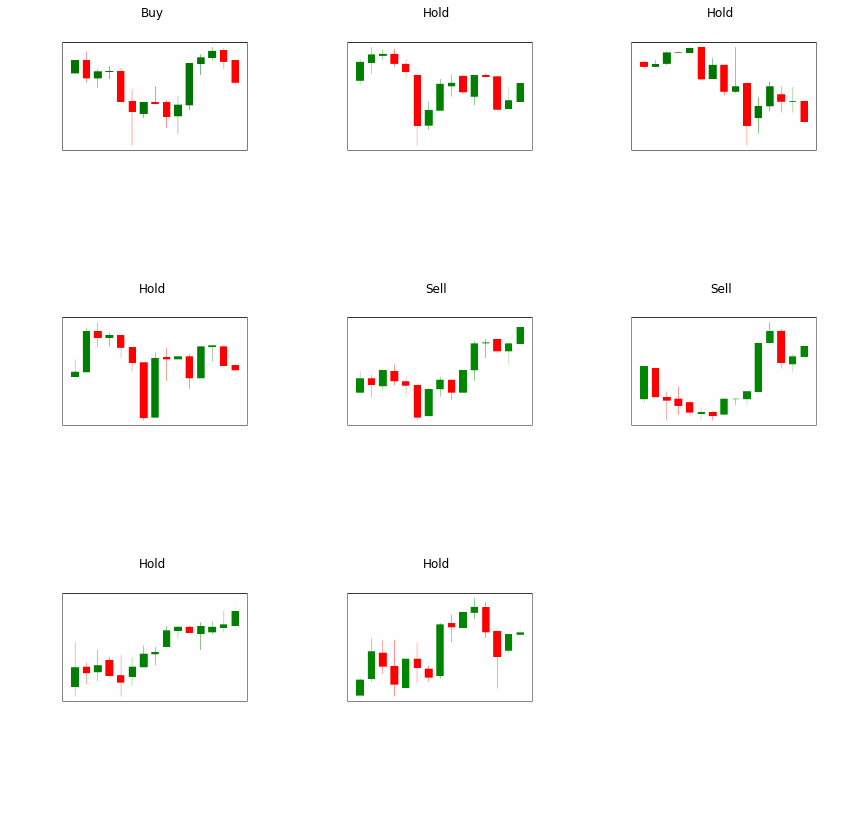

In [25]:
data.show_batch()

In [27]:
gc.collect()

22

In [28]:
# Test Architecture
arch = models.densenet161

# Creating our learner - PRETRAINED on imagenet
learn = create_cnn(data, arch, metrics=[accuracy]).to_fp16()

C:\Users\dmber\Anaconda3\lib\site-packages\fastai\vision\learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to C:\Users\dmber/.cache\torch\checkpoints\densenet161-8d451a50.pth
100%|███████████████████████████████████████████████████████████| 115730790/115730790 [00:05<00:00, 22173597.44it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


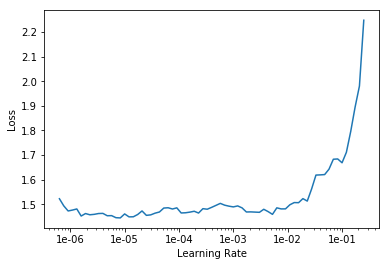

In [29]:
# Finding learning rate
learn.lr_find()
learn.recorder.plot()

In [31]:
lr = 1e-2

In [32]:
# Test one
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,1.001148,4.490998,0.379800,11:46


KeyboardInterrupt: 